# Exploratory Data Analysis (EDA) for Medical Articles

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [5]:
DATA_PATH = "../data/medical_articles.csv"
LABELS = ['Cardiovascular', 'Neurological', 'Hepatorenal', 'Oncological']

try:
    df = pd.read_csv(DATA_PATH, sep=';')
    print("Data loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {DATA_PATH}")
    print(f"Current directory is: {os.getcwd()}")

Data loaded successfully.


,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological


## 1. Label Analysis

Analyze the distribution of the labels in the dataset

In [6]:
# Process labels
df['labels'] = df['group'].fillna('').str.strip().str.split('|')

# One-hot encode the labels
for label in LABELS:
    df[label] = df['labels'].apply(lambda x: 1 if label.lower() in [l.lower() for l in x] else 0)

# Calculate label frequencies
label_counts = df[LABELS].sum().sort_values(ascending=False)

print("--- Label Frequencies ---")
print(label_counts)

--- Label Frequencies ---
Neurological      1785
Cardiovascular    1268
Hepatorenal       1091
Oncological        601
dtype: int64


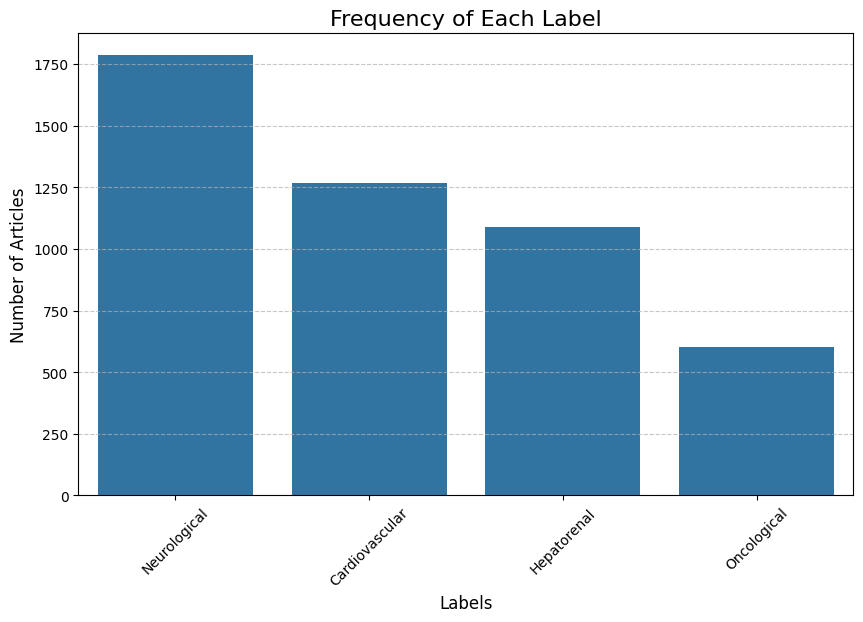

In [7]:
# Plot label frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Frequency of Each Label', fontsize=16)
plt.ylabel('Number of Articles', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Label Co-occurrence

Frequency of labels appearing together

In [8]:
# Calculate co-occurrence matrix
df_labels_only = df[LABELS]
co_occurrence_matrix = df_labels_only.T.dot(df_labels_only)

print("--- Label Co-occurrence Matrix ---")
print(co_occurrence_matrix)

--- Label Co-occurrence Matrix ---
                Cardiovascular  Neurological  Hepatorenal  Oncological
Cardiovascular            1268           356          232           97
Neurological               356          1785          263          189
Hepatorenal                232           263         1091          138
Oncological                 97           189          138          601


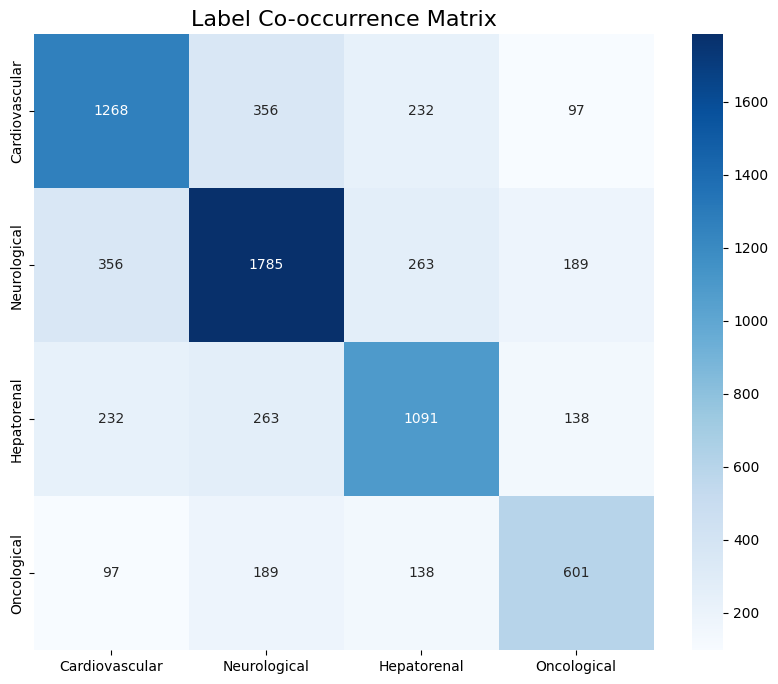

In [9]:
# Plot co-occurrence matrix
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Label Co-occurrence Matrix', fontsize=16)
plt.show()

## 3. Text Analysis: Title and Abstract Length

Calculate the word count for both the `title` and `abstract`

In [10]:
# Calculate word count for title and abstract
df['title_word_count'] = df['title'].str.split().str.len()
df['abstract_word_count'] = df['abstract'].fillna('').str.split().str.len()

df[['title_word_count', 'abstract_word_count']].describe()

,title_word_count,abstract_word_count
count,3565.000000,3565.000000
mean,8.729032,100.056662
std,4.878152,93.066759
min,2.000000,22.000000
25%,5.000000,31.000000
50%,7.000000,37.000000
75%,11.000000,172.000000
max,38.000000,525.000000


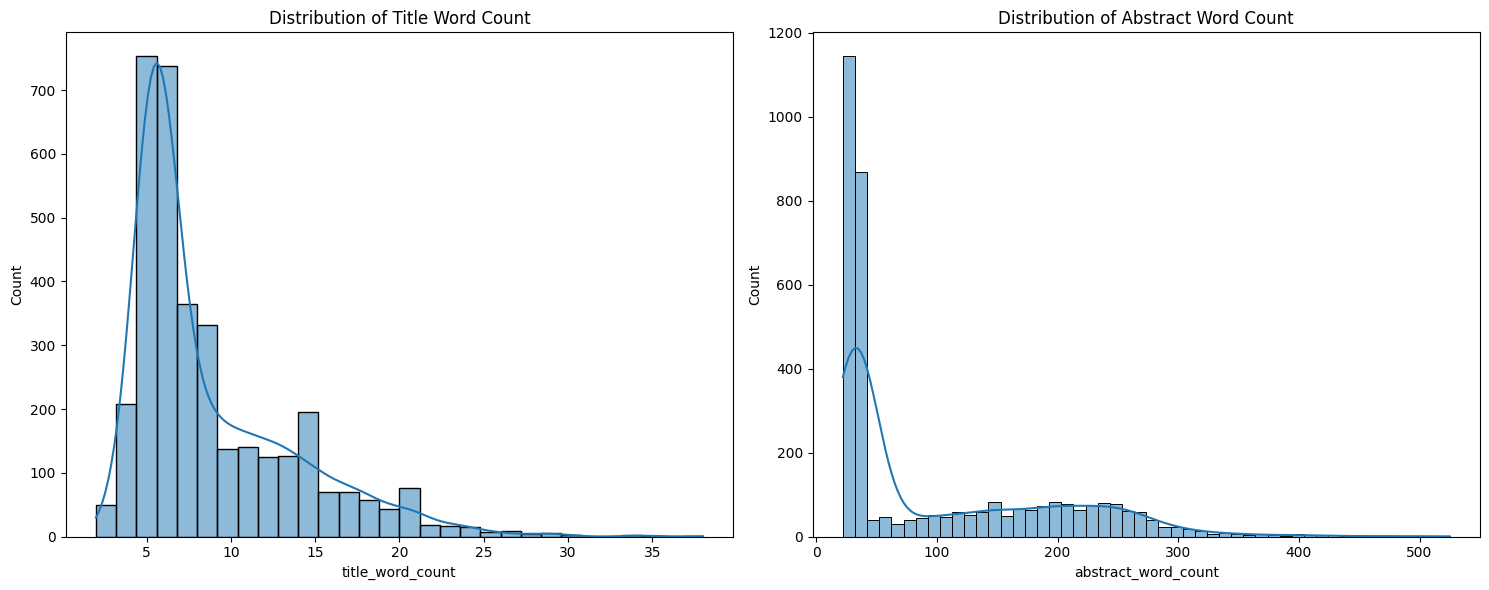

In [11]:
# Plot the distributions of word counts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['title_word_count'], ax=axes[0], kde=True, bins=30)
axes[0].set_title('Distribution of Title Word Count')

sns.histplot(df['abstract_word_count'], ax=axes[1], kde=True, bins=50)
axes[1].set_title('Distribution of Abstract Word Count')

plt.tight_layout()
plt.show()

## 4. Common Words Analysis

Extract the most common words (unigrams) from the combined title and abstract for each label

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Combine title and abstract for analysis
df['full_text'] = df['title'].fillna('') + ' ' + df['abstract'].fillna('')

for label in LABELS:
    print(f'--- Top 15 most common words in {label} ---')
    corpus = df[df[label] == 1]['full_text']
    top_words = get_top_n_words(corpus, n=15)
    for word, freq in top_words:
        print(f'{word}: {freq}')
    print('\n')

--- Top 15 most common words in Cardiovascular ---
patients: 1664
results: 1027
methods: 777
study: 742
cardiac: 706
heart: 700
disease: 662
conclusion: 655
cancer: 539
induced: 450
treatment: 418
hypertension: 380
effects: 361
insights: 359
patient: 356


--- Top 15 most common words in Neurological ---
patients: 2376
results: 1219
induced: 987
study: 956
disease: 921
methods: 816
cancer: 732
gene: 678
treatment: 646
conclusion: 642
effects: 562
mg: 554
patient: 537
clinical: 513
analysis: 468


--- Top 15 most common words in Hepatorenal ---
patients: 1472
results: 808
renal: 696
methods: 628
study: 579
disease: 523
conclusion: 518
induced: 460
cancer: 448
liver: 413
patient: 374
treatment: 360
clinical: 333
analysis: 290
rats: 289


--- Top 15 most common words in Oncological ---
cancer: 1146
patients: 918
mutations: 418
results: 414
brca1: 339
breast: 335
gene: 328
study: 306
methods: 301
disease: 258
conclusion: 232
mutation: 231
treatment: 227
tumor: 227
cell: 223




In [17]:
label = "Oncological"

print(f'--- Top 15 most common words in {label} ---')
corpus = df[df[label] == 1]['full_text']
top_words = get_top_n_words(corpus, n=15)

for word, freq in top_words:
    print(f'{word}: {freq}')


--- Top 15 most common words in Oncological ---
cancer: 1146
patients: 918
mutations: 418
results: 414
brca1: 339
breast: 335
gene: 328
study: 306
methods: 301
disease: 258
conclusion: 232
mutation: 231
treatment: 227
tumor: 227
cell: 223
